Steps	of	project:
1.	Loading	Data
 2.	Data	cleaning
 3.	EDA
 4.	Text	Preprocessing
 5.	Model	Building
 6.	Evaluation
 7.	Convert	into	Website
 8.	Deploy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1.	Loading	Data

In [4]:
 df	=	pd.read_csv('spam.csv',encoding='latin1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

2. DATA CLEANING

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop column unnamed 2, unnamed 3,dan unnamed 4
df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
#mengubah nama v1 menjadi target dan v2 menjadi text
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
 from	sklearn.preprocessing	import	LabelEncoder
 encoder	=	LabelEncoder()
 df['target']	=	encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing value
df.isnull().sum()

,0
target,0
text,0


In [14]:
#check duplikate value
df.duplicated().sum()

403

In [15]:
#drop duplicate
df=df.drop_duplicates(keep='first')

In [16]:
#chek kembali duplicate value
df.duplicated().sum()

0

In [17]:
#melihat baris dan kolom
df.shape

(5169, 2)

 3.	EDA	exploratory	data	analysis

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.target.value_counts()

,count
target,
0,4516
1,653


In [20]:
import	matplotlib.pyplot	as	plt

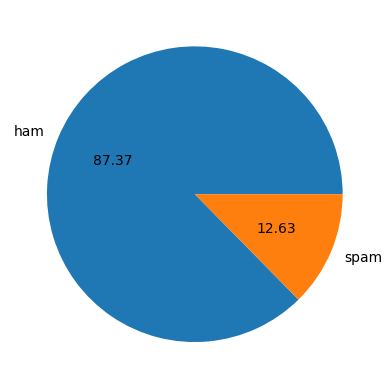

In [21]:
#membuat pie chart  ham dan spam
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%1.2f')
plt.show()

In [22]:
#	Data	is	imbalanced

In [23]:
import	nltk


In [24]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Sekarang kita perlu melakukan analisis yang lebih dalam, maka kita membuat tiga kolom baru

 1.	Number	of	character	in	the	sms
 2.	Number	of	word	in	the	sms
 3.	Number	of	sentences	in	the	sms

In [25]:
#Number of character in the sms
df['num_character']=df['text'].apply(len)

In [28]:
import nltk

# Download the necessary NLTK data
nltk.download('punkt_tab')

#Number of word in the sms
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [29]:
#Number of sentences in the sms
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_character,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
#describe num_character, num_word, num_sentences
df[['num_character','num_word','num_sentences']].describe()

,num_character,num_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


Sekarang kita juga dapat menganalisis ham dan sam dengan cara yang berbeda kemudian kita menulis kode

In [32]:
#ham sms
df[df['target']==0][['num_character','num_word','num_sentences']].describe()

,num_character,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#spam sms
df[df['target']==1][['num_character','num_word','num_sentences']].describe()

,num_character,num_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_character', ylabel='Count'>

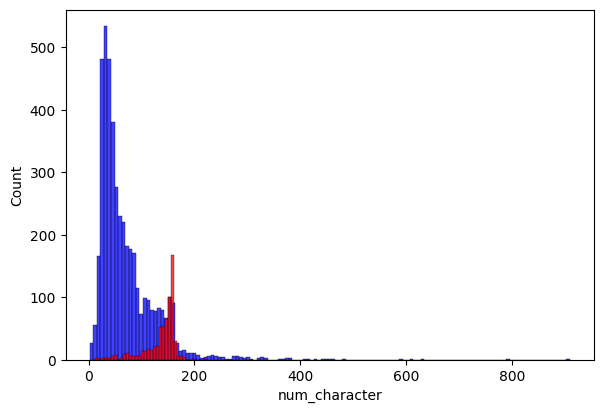

In [34]:
#visualisasi ham dan spam sms
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df[df['target']==0]['num_character'], color = "blue", label = "ham")
sns.histplot(df[df['target']==1]['num_character'], color = "red", label = "spam")

<Axes: xlabel='num_word', ylabel='Count'>

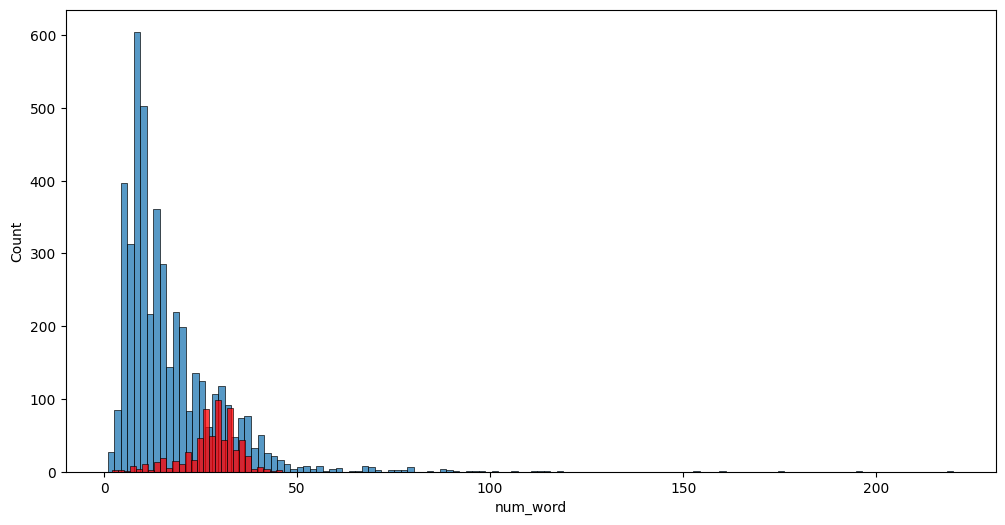

In [35]:
#Visualisasi Pesan ham dan spam dalam istilah tersebut adalah jumlah kata
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']	==	0]['num_word']) # Changed 'num_words' to 'num_word'
sns.histplot(df[df['target']	==	1]['num_word'],color='red') # Changed 'num_words' to 'num_word'

Kita dapat dengan jelas menganalisis bahwa lebih banyak pesan ham dibuat dengan menggunakan lebih sedikit kata dan lebih banyak pesan spam dibuat dengan menggunakan lebih banyak jumlah kata

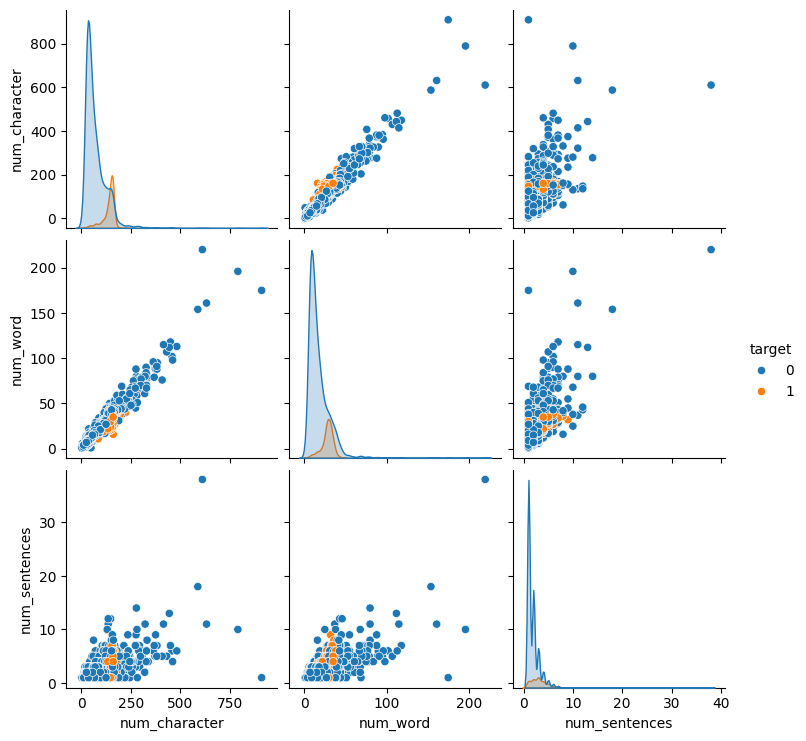

In [36]:
#"Let's	see	how	these	columns	are	related	to	each	other,	and	then	we	will	visualize	them	using	a	pairplot.
sns.pairplot(df,hue='target')

In [37]:
df

,target,text,num_character,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [38]:
#Pilih hanya kolom numerik
numerical_df	=	df.select_dtypes(include=['float64',	'int64'])

In [39]:
df_corrmatrix	=	numerical_df.corr()
print(df_corrmatrix)

                 target  num_character  num_word  num_sentences
target         1.000000       0.384717  0.262912       0.263939
num_character  0.384717       1.000000  0.965760       0.624139
num_word       0.262912       0.965760  1.000000       0.679971
num_sentences  0.263939       0.624139  0.679971       1.000000


<Axes: >

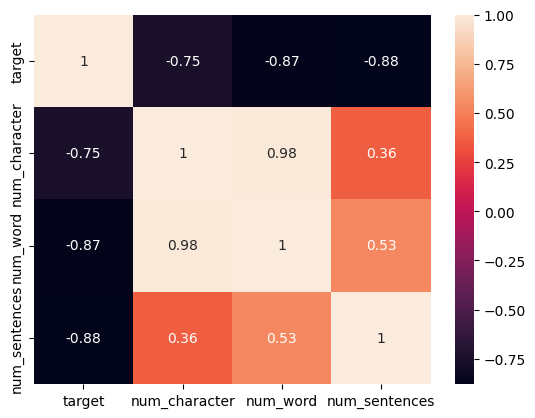

In [40]:
sns.heatmap(df_corrmatrix.corr(),annot=True)